## База данных: продажа обуви
## Выполнил Овсянников Евгений, студент ФРФТ20-1

In [2]:
import pandas as pd

# Структура БД, выполненная в diagram designer с указанием связей и ключей:
<img src="./PG_DB.jpg" width="600">

# Аннотация к работе:
## В данной работе представлена реляционная база данных, отображающая хозяйственную деятельность магазина обуви. 
### В данной базе данных представлена вся информация о: 
#### 1) имеющихся клиентах компании и наличии у них скидки на приобретение товара;
#### 2) заказе, цену со скидкой (при её наличии у клиента) и без скидки, а также включая подробный адрес, куда будет доставлен заказ;
#### 3) обуви, в частности о её типе и основных характеристиках;
#### 4) доставке, в частности id заказа, обуви и доставки;
#### 5) филиале компании, в частности о его местоположении и обуви, хранящейся в ячейках складских помещений. 

### Заказывая обувь, клиент оставляет о себе личную информацию, которая заносится в таблицу Clients по соответствующим столбцам, все дополнительные данные о заказе, в том числе и место его конечной доставки записываются в таблицу Orders. Вся обувь, имеющаяся на складе в филиале компании записывается в таблицу Branches_storage, подробные же характеристики обуви, имеющейся у компании записываются в таблицу Shoes. Используя данные о номере заказа и идентификаторе обуви происходит доставка, подробная информация о которой указывается в таблице Delivery, и если произошёл форс-мажор и товар не был доставлен (заказчик отсутствовал на указанном в заказе адресе и т.д.), то делается соответствующая заметка в столбце delivery_success и обувь отправляется обратно на склад филиала.  

### Вся эта информация может использоваться компанией для анализа своей клиентской базы,  оценки эффективности деятельности, формирования краткосрочных прогнозов. В ходе данной работы были построены таблицы и занесён в них ряд данных, связанных с деятельностью предприятия. Пример данной работы можно использовать в качестве общего шаблона для создания базы данных для аналогичных фирм в малом бизнесе.



In [1]:
import sqlalchemy
from sqlalchemy import create_engine

engine = create_engine('sqlite:///Shoes.db')

In [2]:
from sqlalchemy import MetaData
metadata = MetaData()

In [3]:
from sqlalchemy import (MetaData, Table, Column, Integer, Numeric, String, DateTime, 
                        Boolean, ForeignKey, create_engine, PrimaryKeyConstraint, 
                        UniqueConstraint, CheckConstraint, ForeignKeyConstraint,
                        Index, insert, BigInteger)
from datetime import datetime

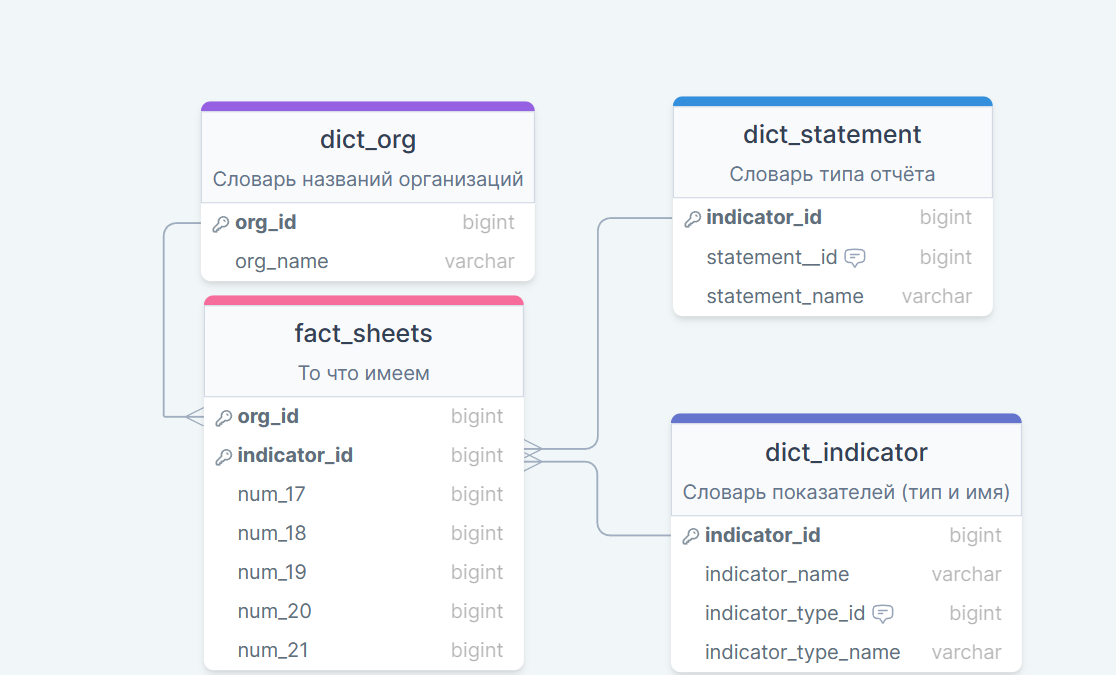

In [7]:
df = pd.read_excel('Данные_для_студентов_на_отправку.xlsx')

In [8]:
df.columns = ['org_id']

,Организация,Показатель,2017,2018,2019,2020,2021
0,Организация 1,Cooтношение дебиторской задолженности к актива...,5.640000e-02,8.360000e-02,1.115000e-01,3.740000e-02,1.636000e-01
1,Организация 1,"Активы всего, RUB",1.267406e+09,1.337535e+09,1.495419e+09,1.524282e+09,1.964642e+09
2,Организация 1,"Валовая прибыль (убыток), RUB",5.039000e+06,3.279700e+07,5.956000e+06,6.881000e+06,1.106100e+07
3,Организация 1,"Валовая рентабельность затрат, %",2.950000e-02,1.725000e-01,2.890000e-02,5.600000e-02,2.750000e-02
4,Организация 1,Валовая рентабельность коммерческих и управлен...,1.607000e-01,1.097000e+00,2.123000e-01,1.888000e-01,-3.579000e-01
...,...,...,...,...,...,...,...
27214,Организация 99,"Текущий налог на прибыль, RUB",NaN,4.101760e+08,2.309780e+08,4.605140e+08,5.590550e+08
27215,Организация 99,"Управленческие расходы, RUB",NaN,NaN,NaN,NaN,1.171310e+09
27216,Организация 99,"Уставный капитал , RUB",1.987778e+10,1.987768e+10,1.987768e+10,1.987768e+10,1.987768e+10
27217,Организация 99,"Чистая норма прибыли, %",1.170000e-02,1.820000e-02,3.020000e-02,3.510000e-02,4.840000e-02


Создадим базу данных

In [4]:
dict_org=Table('dict_org', metadata,
           Column('org_id', Integer(), ForeignKey('fact_sheets.org_id'), primary_key=True),
           Column('org_name', String(),
           extend_existing=True
           ))

In [5]:
fact_sheets=Table('fact_sheets', metadata,
             Column('org_id', Integer(), primary_key=True),
             Column('indicator_id', Integer(), primary_key=True),
             Column('num_17', Float()),
             Column('num_18', Float()),
             Column('num_19', Float()), 
             Column('num_20', Float()),
            Column('num_21', Float()),   
             extend_existing=True
                 )

In [7]:
dict_indicator=Table('dict_indicator', metadata,
            Column('indicator_id', Integer(), ForeignKey('fact_sheets.indicator_id'), primary_key=True),
            Column('statement_id', Integer()),
            Column('statement_name', String()),
            Column('indicator_name', String())
            Column('indicator_type_id', Integer()),
            Column('indicator_type_name', String()),
             extend_existing=True 
            )

In [9]:
metadata.create_all(engine)

Заполним базу данных

Метод одиночной вставки

In [10]:
insert1=Shoes.insert().values(
    shoe_type='Sneakers',
    shoe_id='1',
    branch_id='1',
    shoe_material_type='leather',
    shoe_gender_type='M',
    shoe_size='43'
)
insert2=Shoes.insert().values(
    shoe_type='Slippers',
    shoe_id='2',
    branch_id='2',
    shoe_material_type='rubber',
    shoe_gender_type='M',
    shoe_size='37'    
)
insert3=Shoes.insert().values(
    shoe_type='wellingtons',
    shoe_id='3',
    branch_id='1',
    shoe_material_type='rubber',
    shoe_gender_type='M',
    shoe_size='42'
)
insert4=Clients.insert().values(
    client_email='JJ228@Gmail.com',
    client_name='Jack Jackson',
    phone_number='19238737337',
    discount_status=True,
    ID_number='123123321321'
)
insert5=Clients.insert().values(
    client_email='BoyBH456@Gmail.com',
    client_name='Billy Herrington',
    phone_number='19123763713',
    discount_status=True,
    ID_number='783123781639'
)

In [11]:
connection=engine.connect()
result=connection.execute(insert1)
result=connection.execute(insert2)
result=connection.execute(insert3)
result=connection.execute(insert4)
result=connection.execute(insert5)

Множественная вставка со словарём

In [12]:
bookinsert1=Orders.insert()
bookins=[
    {
        'order_id':1,
        'ID_number':783123781639,
        'shoe_id':1,
        'order_destination_city':'Washington',
        'order_destination_address':'12th Street Expy',
        'order_destination_date':datetime.strptime('2021-09-25','%Y-%m-%d'),
        'order_price_without_discount':40,
        'order_price_with_discount':30.50
    }, 
    {
        'order_id':2,
        'ID_number':783123781639,
        'shoe_id':2,
        'order_destination_city':'Washington',
        'order_destination_address':'12th Street Expy',
        'order_destination_date':datetime.strptime('2021-09-20','%Y-%m-%d'),
        'order_price_without_discount':15,
        'order_price_with_discount':11.99
    },    
    {
        'order_id':3,
        'ID_number': 123123321321,
        'shoe_id':3,
        'order_destination_city':'Washington',
        'order_destination_address':'9th Street Expressway',
        'order_destination_date':datetime.strptime('2021-09-10','%Y-%m-%d'),
        'order_price_without_discount':20,
        'order_price_with_discount':15.15
    }]

In [13]:
result=connection.execute(bookinsert1,bookins)

In [14]:
bookinsert2=Delivery.insert()
bookins1=[
    {
     'delivery_id':1,
     'order_id':1,
     'transport_id':1,  
     'delivery_success':True   
    },
    {     
    'delivery_id':2,
     'order_id':2, 
     'transport_id':1,   
     'delivery_success':True 
    },
    {     
    'delivery_id':3,
     'order_id':3, 
     'transport_id':2,   
     'delivery_success':True 
    }
]

In [15]:
result=connection.execute(bookinsert2,bookins1)

In [16]:
bookinsert3=Branches_storage.insert()
bookins2=[
    {
     'branch_id':1,    
     'branch_address': "G Street  Northwest, 1201",
     'shoe_id': 1
    },
    {'branch_id':2,    
     'branch_address': "G Street  Northwest, 1301",
     'shoe_id': 2
    }
]

In [17]:
result=connection.execute(bookinsert3,bookins2)